In [1]:
%cd ..

C:\Users\ilyap\dev\python\python


In [2]:
from investments import moex
from investments import instruments
import numpy as np
import pandas as pd
from datetime import date
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
%matplotlib notebook

In [4]:
sns.set()

In [5]:
usd=moex.FXInstrument("USD000UTSTOM")
eur=moex.FXInstrument("EUR_RUB__TOM")
realty=moex.IndexInstrument("MREDC")

In [6]:
usd_ohlc = usd.load_ohlc_table()
eur_ohlc = eur.load_ohlc_table()
realty_ohlc = realty.load_ohlc_table()

2021-01-21 22:49:42,800 INFO investments.moex Loading USD000UTSTOM from beginning
2021-01-21 22:49:43,283 INFO investments.moex Skipping 2003-05-23 for USD000UTSTOM as it had no trades
2021-01-21 22:49:43,286 INFO investments.moex Skipping 2003-06-20 for USD000UTSTOM as it had no trades
2021-01-21 22:49:43,290 INFO investments.moex Skipping 2003-07-03 for USD000UTSTOM as it had no trades
2021-01-21 22:49:43,293 INFO investments.moex Skipping 2003-08-29 for USD000UTSTOM as it had no trades
2021-01-21 22:49:43,296 INFO investments.moex Loading USDRUB_TOM (USD000UTSTOM) from 2003-09-06
2021-01-21 22:49:43,744 INFO investments.moex Skipping 2003-10-10 for USDRUB_TOM (USD000UTSTOM) as it had no trades
2021-01-21 22:49:43,746 INFO investments.moex Skipping 2003-11-10 for USDRUB_TOM (USD000UTSTOM) as it had no trades
2021-01-21 22:49:43,747 INFO investments.moex Skipping 2003-11-26 for USDRUB_TOM (USD000UTSTOM) as it had no trades
2021-01-21 22:49:43,749 INFO investments.moex Skipping 2003-12

2021-01-21 22:50:06,664 INFO investments.moex Loading EURRUB_TOM (EUR_RUB__TOM) from 2013-02-06
2021-01-21 22:50:07,059 INFO investments.moex Loading EURRUB_TOM (EUR_RUB__TOM) from 2013-07-02
2021-01-21 22:50:07,440 INFO investments.moex Loading EURRUB_TOM (EUR_RUB__TOM) from 2013-11-20
2021-01-21 22:50:07,813 INFO investments.moex Loading EURRUB_TOM (EUR_RUB__TOM) from 2014-04-17
2021-01-21 22:50:08,188 INFO investments.moex Loading EURRUB_TOM (EUR_RUB__TOM) from 2014-09-09
2021-01-21 22:50:08,545 INFO investments.moex Loading EURRUB_TOM (EUR_RUB__TOM) from 2015-02-03
2021-01-21 22:50:09,000 INFO investments.moex Loading EURRUB_TOM (EUR_RUB__TOM) from 2015-07-01
2021-01-21 22:50:09,334 INFO investments.moex Loading EURRUB_TOM (EUR_RUB__TOM) from 2015-11-19
2021-01-21 22:50:09,657 INFO investments.moex Loading EURRUB_TOM (EUR_RUB__TOM) from 2016-04-14
2021-01-21 22:50:09,964 INFO investments.moex Loading EURRUB_TOM (EUR_RUB__TOM) from 2016-09-07
2021-01-21 22:50:10,282 INFO investments

In [93]:
usd.update_ohlc_table(usd_ohlc)
eur.update_ohlc_table(eur_ohlc)
realty.update_ohlc_table(realty_ohlc)

2021-01-23 10:48:00,823 INFO investments.moex Loading USDRUB_TOM (USD000UTSTOM) from 2021-01-21
2021-01-23 10:48:01,015 INFO investments.moex Loading USDRUB_TOM (USD000UTSTOM) from 2021-01-23
2021-01-23 10:48:01,095 INFO investments.moex Loading EURRUB_TOM (EUR_RUB__TOM) from 2021-01-21
2021-01-23 10:48:01,171 INFO investments.moex Loading EURRUB_TOM (EUR_RUB__TOM) from 2021-01-23
2021-01-23 10:48:01,256 INFO investments.moex Loading Индекс недвиж-ти ДомКлик Москва (MREDC) from 2021-01-21


In [94]:
df_usd=pd.DataFrame(usd_ohlc.ohlc_series)
df_usd=df_usd.set_index("date")
df_eur=pd.DataFrame(eur_ohlc.ohlc_series)
df_eur=df_eur.set_index("date")
df_realty=pd.DataFrame(realty_ohlc.ohlc_series)
df_realty=df_realty.set_index("date")

In [95]:
df_realty.tail()

,open,high,low,close,num_trades,volume,waprice
date,,,,,,,
2020-12-23,204029.43,204029.43,204029.43,204029.43,1,0.0,0.0
2020-12-30,205220.19,205220.19,205220.19,205220.19,1,0.0,0.0
2021-01-06,205331.12,205331.12,205331.12,205331.12,1,0.0,0.0
2021-01-13,204928.21,204928.21,204928.21,204928.21,1,0.0,0.0
2021-01-20,205729.38,205729.38,205729.38,205729.38,1,0.0,0.0


In [96]:
df_realty.describe()

,open,high,low,close,num_trades,volume,waprice
count,213.000000,213.000000,213.000000,213.000000,213.0,213.0,213.0
mean,171835.940751,171840.201127,171835.940751,171840.201127,1.0,0.0,0.0
std,13917.094485,13925.366349,13917.094485,13925.366349,0.0,0.0,0.0
min,155408.840000,155408.840000,155408.840000,155408.840000,1.0,0.0,0.0
25%,158496.880000,158496.880000,158496.880000,158496.880000,1.0,0.0,0.0
50%,169302.810000,169302.810000,169302.810000,169302.810000,1.0,0.0,0.0
75%,182274.240000,182274.240000,182274.240000,182274.240000,1.0,0.0,0.0
max,205729.380000,205729.380000,205729.380000,205729.380000,1.0,0.0,0.0


In [19]:
df_eur.describe()

,open,high,low,close,num_trades,volume,waprice
count,3894.000000,3894.000000,3894.000000,3894.000000,3894.000000,3.894000e+03,3894.000000
mean,52.927153,53.212417,52.648149,52.923052,2907.865948,1.509861e+10,52.923492
std,17.232276,17.461834,17.024936,17.235226,3234.107465,1.244835e+10,17.236364
min,33.320100,33.345000,33.000000,33.330000,9.000000,2.053429e+07,33.331400
25%,39.032000,39.130025,38.941125,39.021250,437.500000,5.625219e+09,39.031625
50%,43.960000,44.100000,43.842500,43.946000,1271.500000,1.250237e+10,43.959350
75%,70.480625,70.824375,70.062500,70.453750,5164.750000,2.242852e+10,70.469650
max,93.615000,100.740000,92.952500,93.775000,23195.000000,1.061776e+11,93.722200


In [97]:
medians_usd=[(year,
  df_usd[date(year,12,20):date(year,12,31)]["close"].median(),
  df_usd[date(year+1,1,10):date(year+1,1,20)]["close"].median()) 
 for year in range(2003,2021)]
medians_eur=[(year,
  df_eur[date(year,12,20):date(year,12,31)]["close"].median(),
  df_eur[date(year+1,1,10):date(year+1,1,20)]["close"].median()) 
 for year in range(2005,2021)]

In [98]:
df_medians_usd = pd.DataFrame(medians_usd, 
                              columns=["year", 
                                        "median at last days of year", 
                                        "median at first days of next year"]).set_index("year")
df_medians_eur = pd.DataFrame(medians_eur, 
                              columns=["year", 
                                        "median at last days of year", 
                                        "median at first days of next year"]).set_index("year")

In [99]:
df_medians_usd["increase"]=df_medians_usd["median at first days of next year"]/df_medians_usd["median at last days of year"]-1.0
df_medians_eur["increase"]=df_medians_eur["median at first days of next year"]/df_medians_eur["median at last days of year"]-1.0

In [100]:
df_medians_usd["buy in december?"] = df_medians_usd["increase"] > 0.05
df_medians_eur["buy in december?"] = df_medians_eur["increase"] > 0.05

In [101]:
df_medians_usd

,median at last days of year,median at first days of next year,increase,buy in december?
year,,,,
2003,29.24500,28.8750,-0.012652,False
2004,27.83375,28.0062,0.006196,False
2005,28.80000,28.3400,-0.015972,False
2006,26.34000,26.5625,0.008447,False
2007,24.71000,24.3630,-0.014043,False
2008,28.68375,32.0400,0.117009,True
2009,30.13000,29.5640,-0.018785,False
2010,30.57000,30.0050,-0.018482,False
2011,31.72000,31.5600,-0.005044,False


In [102]:
df_medians_eur

,median at last days of year,median at first days of next year,increase,buy in december?
year,,,,
2005,34.18250,34.37000,0.005485,False
2006,34.65750,34.37000,-0.008295,False
2007,35.61500,36.04000,0.011933,False
2008,40.17625,42.08875,0.047603,False
2009,43.24875,42.58300,-0.015394,False
2010,40.08000,39.97000,-0.002745,False
2011,41.20000,40.38000,-0.019903,False
2012,40.41000,40.35000,-0.001485,False
2013,44.78500,45.47800,0.015474,False


In [25]:
df_usd

,open,high,low,close,num_trades,volume,waprice
date,,,,,,,
2003-04-15,31.1850,31.1975,31.1850,31.1970,55,1.132583e+09,31.1912
2003-04-16,31.1950,31.1950,31.1850,31.1885,65,7.289744e+08,31.1901
2003-04-17,31.1800,31.2000,31.1700,31.1975,63,1.879374e+09,31.1872
2003-04-18,31.1975,31.1975,31.1800,31.1801,51,1.053497e+09,31.1824
2003-04-21,31.1065,31.1100,31.1000,31.1025,47,5.165712e+08,31.1019
...,...,...,...,...,...,...,...
2021-01-05,74.1125,75.2875,73.8500,74.0400,65551,2.012427e+11,74.6358
2021-01-06,73.7800,74.2075,73.3975,73.9225,58366,1.477447e+11,73.7675
2021-01-08,74.2650,74.8350,73.8175,74.1550,63278,1.738605e+11,74.2494


In [20]:
df_eur

,open,high,low,close,num_trades,volume,waprice
date,,,,,,,
2005-06-20,34.790,34.8300,34.7701,34.8100,21,1.572245e+08,34.8073
2005-06-21,34.665,34.6750,34.5775,34.5850,29,1.642754e+08,34.6353
2005-06-22,34.780,34.8150,34.7200,34.7200,23,1.136216e+08,34.7679
2005-06-23,34.680,34.6800,34.6000,34.6200,25,1.909008e+08,34.6316
2005-06-24,34.520,34.6200,34.5200,34.5600,24,7.324768e+07,34.5671
...,...,...,...,...,...,...,...
2020-12-24,91.600,91.7375,89.9600,90.0950,8978,3.996634e+10,90.8619
2020-12-25,90.095,90.6675,89.7700,90.5650,10352,4.883437e+10,90.0382
2020-12-28,90.560,90.6800,89.8450,90.0550,9023,4.837377e+10,90.0865


In [21]:
plt.style.use('seaborn-whitegrid')

In [26]:
df_eur["close"].rolling(window=10).mean()

date
2005-06-20         NaN
2005-06-21         NaN
2005-06-22         NaN
2005-06-23         NaN
2005-06-24         NaN
                ...   
2021-01-05    91.01075
2021-01-06    90.96750
2021-01-08    90.80525
2021-01-11    90.73650
2021-01-12    90.70600
Name: close, Length: 3894, dtype: float64

<IPython.core.display.Javascript object>


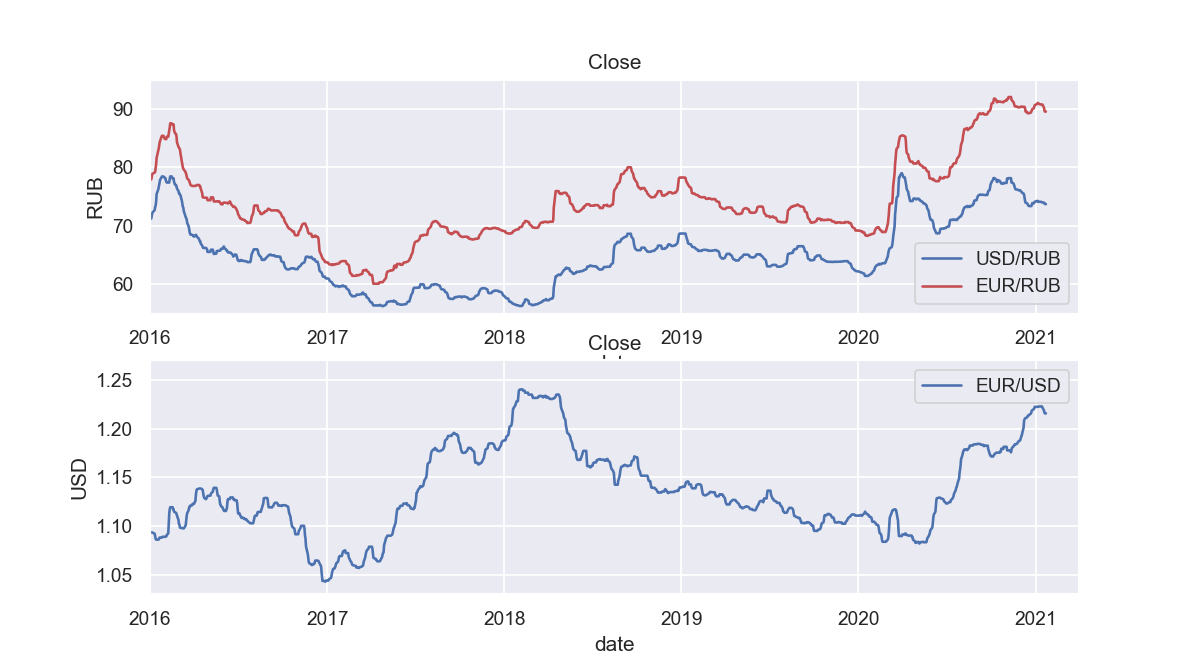

In [103]:
fig, ax = plt.subplots(2)
ax[0].plot(df_usd.index, df_usd["close"].rolling(window=10).median(),'b',label='USD/RUB')
ax[0].plot(df_eur.index, df_eur["close"].rolling(window=10).median(),'r',label='EUR/RUB')
ax[0].set(xlim=(date(2016,1,1),date(2021,3,31)), ylim=(55,95), xlabel='date', ylabel='RUB', title='Close')
leg=ax[0].legend()
ax[1].plot(df_usd.index, (df_eur["close"]/df_usd["close"]).rolling(window=10).median(),'b',label='EUR/USD')
ax[1].set(xlim=(date(2016,1,1),date(2021,3,31)), ylim=(1.03,1.27), xlabel='date', ylabel='USD', title='Close')
ax[1].legend()

In [104]:
q=usd.load_intraday_quotes()
q

IntradayQuote(instrument='USD000UTSTOM', last=75.3, num_trades=95240, is_trading=False, time=datetime.time(23, 49, 59))

In [53]:
merged=pd.concat([df_eur, df_usd], axis='columns', keys=["EUR","USD"], sort=True, verify_integrity=True)

In [62]:
merged

EUR                                                      \
               open     high      low    close num_trades        volume   
2003-04-15      NaN      NaN      NaN      NaN        NaN           NaN   
2003-04-16      NaN      NaN      NaN      NaN        NaN           NaN   
2003-04-17      NaN      NaN      NaN      NaN        NaN           NaN   
2003-04-18      NaN      NaN      NaN      NaN        NaN           NaN   
2003-04-21      NaN      NaN      NaN      NaN        NaN           NaN   
...             ...      ...      ...      ...        ...           ...   
2021-01-05  90.8475  92.3425  90.8475  91.0025     7819.0  1.904461e+10   
2021-01-06  91.0000  91.3525  90.5850  91.0975     5587.0  1.349711e+10   
2021-01-08  90.9375  91.4775  90.6000  90.6000     6267.0  1.602933e+10   
2021-01-11  90.6975  91.1150  90.5000  90.8000     8644.0  4.144779e+10   
2021-01-12  90.4400  90.5325  89.4500  89.7900    10546.0  3.156679e+10   

                         USD                                        \
            waprice     open     high      low    close num_trades   
2003-04-15      NaN  31.1850  31.1975  31.1850  31.1970         55   
2003-04-16      NaN  31.1950  31.1950  31.1850  31.1885         65   
2003-04-17      NaN  31.1800  31.2000  31.1700  31.1975         63   
2003-04-18      NaN  31.1975  31.1975  31.1800  31.1801         51   
2003-04-21      NaN  31.1065  31.1100  31.1000  31.1025         47   
...             ...      ...      ...      ...      ...        ...   
2021-01-05  91.6964  74.1125  75.2875  73.8500  74.0400      65551   
2021-01-06  90.8994  73.7800  74.2075  73.3975  73.9225      58366   
2021-01-08  90.8765  74.2650  74.8350  73.8175  74.1550      63278   
2021-01-11  90.8031  74.4325  75.0000  74.2650  74.6600      70645   
2021-01-12  90.0200  74.4600  74.4600  73.5000  73.5400      76982   

                                   
                  volume  waprice  
2003-04-15  1.132583e+09  31.1912  
2003-04-16  7.289744e+08  31.1901  
2003-04-17  1.879374e+09  31.1872  
2003-04-18  1.053497e+09  31.1824  
2003-04-21  5.165712e+08  31.1019  
...                  ...      ...  
2021-01-05  2.012427e+11  74.6358  
2021-01-06  1.477447e+11  73.7675  
2021-01-08  1.738605e+11  74.2494  
2021-01-11  2.942960e+11  74.6261  
2021-01-12  2.591083e+11  74.0069  

[4418 rows x 14 columns]

In [65]:
(merged["EUR"]["close"]/merged["USD"]["close"]).dropna()

2005-06-20    1.220547
2005-06-21    1.208847
2005-06-22    1.213990
2005-06-23    1.207323
2005-06-24    1.206392
                ...   
2021-01-05    1.229099
2021-01-06    1.232338
2021-01-08    1.221765
2021-01-11    1.216180
2021-01-12    1.220968
Name: close, Length: 3894, dtype: float64

In [60]:
merged["EUR"][merged["EUR"]["open"].isna()]

,open,high,low,close,num_trades,volume,waprice
2003-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2005-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
moex.ShareInstrument("SBMX").load_intraday_quotes()

IntradayQuote(instrument='SBMX', last=1694.5, num_trades=734, is_trading=False, time=datetime.time(18, 44, 42))

In [105]:
realty.load_intraday_quotes()

IntradayQuote(instrument='MREDC', last=0.0, num_trades=0, is_trading=False, time=datetime.time(18, 50))

In [109]:
df_realty

,open,high,low,close,num_trades,volume,waprice
date,,,,,,,
2016-12-28,159646.69,159646.69,159646.69,159646.69,1,0.0,0.0
2017-01-04,158952.36,158952.36,158952.36,158952.36,1,0.0,0.0
2017-01-11,158470.18,158470.18,158470.18,158470.18,1,0.0,0.0
2017-01-18,157778.75,157778.75,157778.75,157778.75,1,0.0,0.0
2017-01-25,157832.09,157832.09,157832.09,157832.09,1,0.0,0.0
...,...,...,...,...,...,...,...
2020-12-23,204029.43,204029.43,204029.43,204029.43,1,0.0,0.0
2020-12-30,205220.19,205220.19,205220.19,205220.19,1,0.0,0.0
2021-01-06,205331.12,205331.12,205331.12,205331.12,1,0.0,0.0


In [126]:
ser_realty_eur=(df_realty["close"]/df_eur["close"]).dropna()
ser_realty_usd=(df_realty["close"]/df_usd["close"]).dropna()
ser_realty_eur

date
2016-12-28    2541.942361
2017-01-04    2508.420878
2017-01-11    2510.021066
2017-01-18    2492.653738
2017-01-25    2467.282945
                 ...     
2020-12-23    2230.134499
2020-12-30    2242.414729
2021-01-06    2253.970965
2021-01-13    2286.889968
2021-01-20    2312.605441
Name: close, Length: 205, dtype: float64

In [128]:
ser_realty_eur.corr(df_eur["close"])

-0.6141508499940737

In [127]:
ser_realty_usd.corr(df_usd["close"])

-0.5133192061016171

In [124]:
df_realty["close"].corr(df_eur["close"])

0.7408114264004927

In [135]:
df_realty["close"].corr(df_usd["close"])

0.8262834923463804

In [129]:
ratio_eur=0.2
years=range(2017,2021)
corrs=pd.Series([df_realty[date(year,1,1):date(year,12,31)]["close"]
 .corr(ratio_eur*df_eur[date(year,1,1):date(year,12,31)]["close"]+
       (1.0-ratio_eur)*df_usd[date(year,1,1):date(year,12,31)]["close"]) 
 for year in years], index=years, name="corr m^2/ccy")
corrs

2017   -0.232455
2018    0.755216
2019   -0.654643
2020    0.634733
Name: corr m^2/ccy, dtype: float64

In [130]:
corrs.sum()

0.5028502774949566

In [131]:
ser_realty_eur.describe()

count     205.000000
mean     2331.638952
std       168.082364
min      2016.116415
25%      2204.263493
50%      2286.889968
75%      2479.355057
max      2661.668574
Name: close, dtype: float64

In [132]:
df_realty["close"].describe()

count       213.000000
mean     171840.201127
std       13925.366349
min      155408.840000
25%      158496.880000
50%      169302.810000
75%      182274.240000
max      205729.380000
Name: close, dtype: float64

In [192]:
ratio_in_usd=0.25
usdrub_buy=73.78
usdrub_sell=75
# how much more beneficial it would be to buy x% of full price using two diff. rates vs simple buying in roubles
hedge_via_predicted_sell=(ratio_in_usd*df_realty["close"]/usdrub_buy)*usdrub_sell - ratio_in_usd*df_realty["close"]
# if to sell $ at time of buying flat
hedge_via_observed_sell=(ratio_in_usd*df_realty["close"]/usdrub_buy)*df_usd["close"] - ratio_in_usd*df_realty["close"]
hedge_via_observed_sell=hedge_via_observed_sell.dropna()
hedged_realty_via_predicted_sell=df_realty["close"] - hedge_via_predicted_sell
hedged_realty_via_observed_sell=df_realty["close"] - hedge_via_observed_sell

In [193]:
hedge_via_predicted_sell.describe()

count    213.000000
mean     710.372206
std       57.566234
min      642.446411
25%      655.212095
50%      699.882855
75%      753.505600
max      850.467076
Name: close, dtype: float64

In [194]:
hedge_via_observed_sell.describe()

count     205.000000
mean    -5066.969621
std      3410.137714
min     -9420.193264
25%     -7735.150265
50%     -5912.634331
75%     -3788.382546
max      4408.359813
Name: close, dtype: float64

In [195]:
hedge_via_observed_sell

date
2016-12-28   -7273.142271
2017-01-04   -7174.184858
2017-01-11   -7535.012201
2017-01-18   -7602.378100
2017-01-25   -7627.677499
                 ...     
2020-12-23     898.747150
2020-12-30     441.565535
2021-01-06      99.145041
2021-01-13     -22.567657
2021-01-20    -181.247082
Name: close, Length: 205, dtype: float64

In [196]:
df_realty["close"]

date
2016-12-28    159646.69
2017-01-04    158952.36
2017-01-11    158470.18
2017-01-18    157778.75
2017-01-25    157832.09
                ...    
2020-12-23    204029.43
2020-12-30    205220.19
2021-01-06    205331.12
2021-01-13    204928.21
2021-01-20    205729.38
Name: close, Length: 213, dtype: float64

In [197]:
hedged_realty_via_observed_sell

date
2016-12-28    166919.832271
2017-01-04    166126.544858
2017-01-11    166005.192201
2017-01-18    165381.128100
2017-01-25    165459.767499
                  ...      
2020-12-23    203130.682850
2020-12-30    204778.624465
2021-01-06    205231.974959
2021-01-13    204950.777657
2021-01-20    205910.627082
Name: close, Length: 213, dtype: float64

In [180]:
5/205

0.024390243902439025

In [191]:
df_realty["close"].tail(1)*80*0.25/75.3/12

date
2021-01-20    4553.549801
Name: close, dtype: float64

In [189]:
df_usd["close"].tail(1)

date
2021-01-22    75.3
Name: close, dtype: float64

<IPython.core.display.Javascript object>


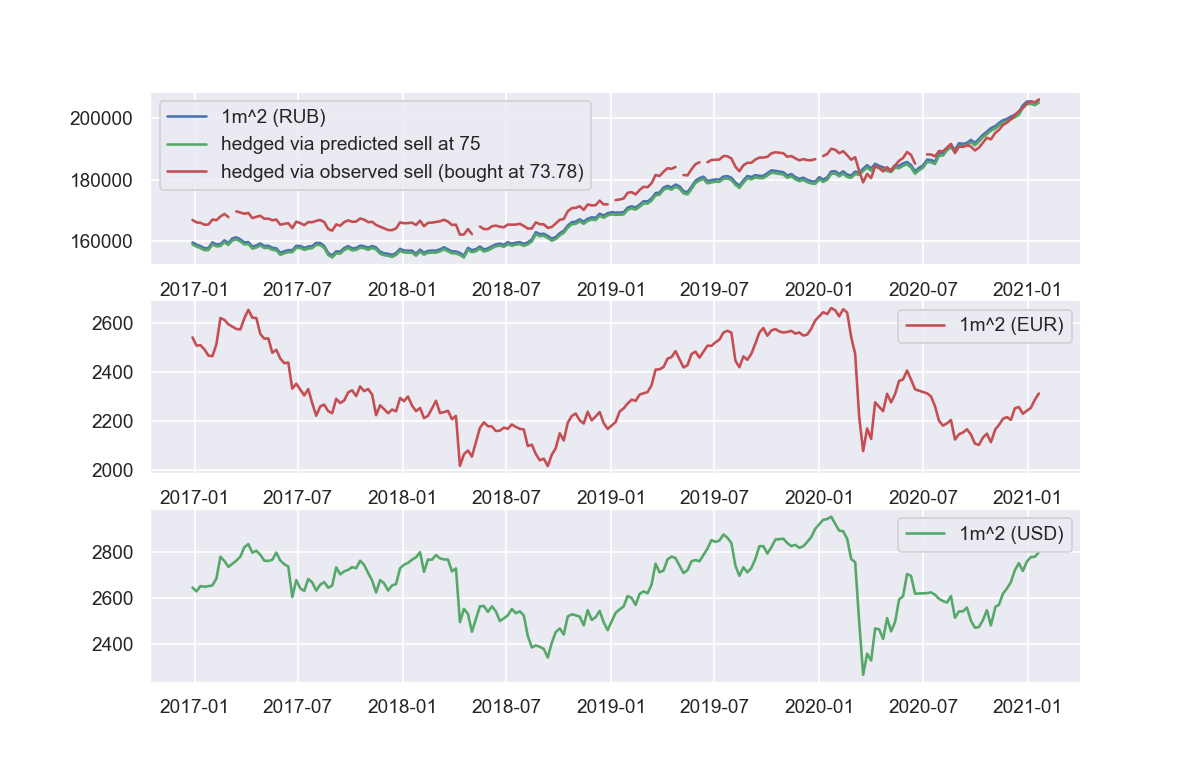

In [198]:
fig, ax = plt.subplots(3)
ax[0].plot(df_realty.index, df_realty["close"],'b',label='1m^2 (RUB)')
ax[0].plot(hedged_realty_via_predicted_sell.index, hedged_realty_via_predicted_sell, "g", label=f'hedged via predicted sell at {usdrub_sell}')
ax[0].plot(hedged_realty_via_observed_sell.index, hedged_realty_via_observed_sell, "r", label=f'hedged via observed sell (bought at {usdrub_buy})')
ax[0].legend()
ax[1].plot(ser_realty_eur.index, ser_realty_eur,'r',label='1m^2 (EUR)')
ax[1].legend()
ax[2].plot(ser_realty_usd.index, ser_realty_usd,'g',label='1m^2 (USD)')
ax[2].legend()